In [1]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X = cancer['data']
y = cancer['target']
print(cancer.target_names)

['malignant' 'benign']


In [2]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

print(f'Training examples: {X_train.shape[0]:,}')
print(f'Test examples: {X_test.shape[0]:,}')

Training examples: 455
Test examples: 114


* Use PCA to reduce dimentionality and use a linear regression to predict
* Use t-SNE to visualize

In [4]:
X.shape

(569, 30)

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

p = Pipeline([('scaling', StandardScaler()), 
              ('pca', PCA()),
              ('model', LinearRegression())
             ])

params = {'pca__n_components': [5,10,20,25,30]}
from sklearn.linear_model import LinearRegression

p.fit(X_train, y_train)

print(f'Training accuracy: {p.score(X_train, y_train):.2%}')
print(f'Test accuracy: {p.score(X_test, y_test):.2%}')

Training accuracy: 77.08%
Test accuracy: 77.18%


In [6]:
param_grid = {'pca__n_components': [5,10,20,25,30],
}

grid = GridSearchCV(p, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaling', StandardScaler()),
                                       ('pca', PCA()),
                                       ('model', LinearRegression())]),
             param_grid={'pca__n_components': [5, 10, 20, 25, 30]})

In [7]:
best_model = grid.best_estimator_
print("Best model selected by GridSearchCV:")
print(best_model)

Best model selected by GridSearchCV:
Pipeline(steps=[('scaling', StandardScaler()), ('pca', PCA(n_components=25)),
                ('model', LinearRegression())])


In [8]:
data_predictions = p.predict(X_test)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,data_predictions)
mse

0.05197617164302721

In [9]:
import numpy as np
rmse = np.sqrt(mse)
rmse

0.2279828319041309

In [10]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,data_predictions)
r2

0.7717965112591955

>Classification metrics are not suitable for evaluating the performance of a linear regression model that predicts continuous targets. This is because classification metrics are designed to evaluate the performance of models that predict discrete classes, while linear regression models predict continuous values.

> For linear regression, evaluation metrics such as mean squared error (MSE), root mean squared error (RMSE), mean absolute error (MAE), and R-squared (R2) are commonly used to assess the performance of the model.

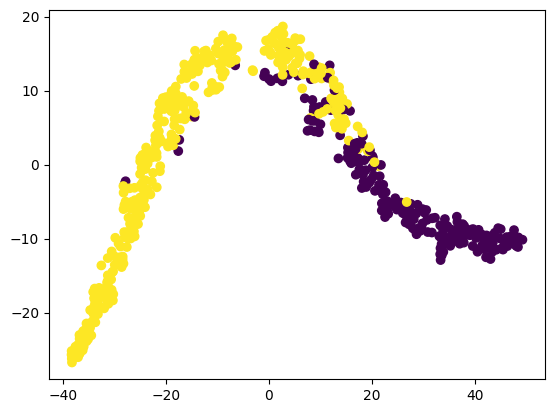

In [11]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# assuming X is your feature matrix
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# create a scatter plot of the data in 2D
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)
plt.show()